Q1.Implement the counting measure in Python. Test that it satisfies additivity on the disjoint sets
{"a", "b", "c"}, {"d", "e", "f"}.

sets.asp.
Bonus mark if your implementation of the counting measure checks that the input type is correct and
raises an error otherwise.

In [1]:

x = {"a", "b", "c"}
y = {"d", "e", "f"}

def my_countmeasure(x):
    assert type(x) == set , "input should be set"
    return len(x)
def additivity_check(x,y):
    u=my_countmeasure(x)+my_countmeasure(y)

    z=x.union(y)
    return my_countmeasure(z)==u

    
additivity_check(x,y)


True

Q2.Create a Python class which implements intervals. Use this new data type to write a function
which implements the length measure on intervals. Test it on the interval [1, 3.5].
Bonus mark if your implementation of the length measure checks that the input type is correct and raises
an error otherwise.


In [53]:
class interval:
    def __init__(self,start,stop):
        
        if not (type(start) in [int,float] and  type(stop) in [int,float]):
            raise Exception("input should be float and int")
        elif stop < start:
            raise Exception("The first interval should be greater number")


        self.start=start
        self.stop=stop
        


i = interval(1,3.5 )
i.start

def lengthmeasure(interval):   
    return( interval.stop-interval.start)
lengthmeasure(i)

2.5

Q3.Import scipy.stats in order to access the scipy.stats.expon distribution. This implements the exponential distribution Exp(λ). Make sure you read the documentation https://docs.scipy.
org/doc/scipy/reference/generated/scipy.stats.expon.html to understand how it works and how
the parameter λ is encoded. Using the cdf method of scipy.stats.expon define a function called
expon_measure which will take as input an interval (defined in the previous question) and will return
its probability mass under the probability measure Exp (2) (i.e. λ = 2). Test your function by computing
the probability measure of the following intervals:

In [67]:
from scipy.stats import expon
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

In [64]:

def expon_measure(interval):
    #cdf(interval.stop, loc=0, scale=1/2) - cdf(interval.start,loc=0, scale=1/2)

    return  expon.cdf(interval.stop, loc=0, scale=1/2) - expon.cdf(interval.start,loc=0, scale=1/2)
 
intervals = [interval(0,1), interval(1,1),interval(1,10),interval(0, float('inf'))]

for x in intervals:

    print(expon_measure(x))




    

    
    

0.8646647167633873
0.0
0.13533528117545912
1.0


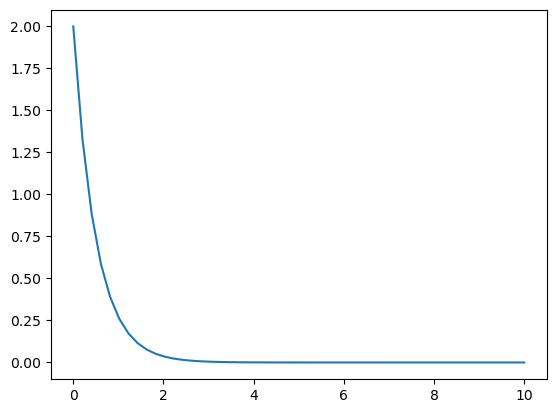

In [66]:
x = np.linspace(0, 10, num=50)
y = expon.pdf(x, loc=0, scale=1/2)
    
plt.plot(x, y)

Majority of the area is shown between the interval between o and 1 thats matches the output of 0.8646647167633873 and for second interval 1,1 we get the output of 0 as the area under the curve for a point is zero.For third interval 1,10 we get the output of 0.13533528117545912 as we can see the area under the graph is quite minimal in this region. As we know the probablity of sample space is 1 hence we get 1 as output for interval 0,infinity.

Q4.Using the pdf method of scipy.stats.expon, define a function called expon_pdf which will
take one argument x and return the pdf of the probability measure Exp (2) evaluated at x. Import
the integration routine quad from scipy.integrate, and read the documentation https://docs.scipy.
org/doc/scipy/reference/generated/scipy.integrate.quad.html to see how it works. Use quad to
compute and print the following integrals

In [70]:
def expon_pdf(x):
    y = expon.pdf(x, loc=0, scale=1/2)
    return y
print(quad(expon_pdf,0,1)) 
    
print(quad(expon_pdf,1,1))

print(quad(expon_pdf,1,10))

print(quad(expon_pdf,0,np.inf))

 

(0.8646647167633872, 9.59970677131702e-15)
(0.0, 0.0)
(0.13533528117545912, 2.4502060294750603e-09)
(1.0, 1.547006336759497e-10)


#both of the questions give similar outputs as in Q3 we substracted two cdf's and got area between them and in Q4 we integrated pdf to get area between any two intervals hence we are getting same measures in both of the questions